# Bike Sharing Assignment #

### Description of Data ###

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Light Mist, : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Import Necessary Libraries ###

In [1]:
## Import Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Scikit learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Import Statsmodel 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Data Preparation and Analysis ###

#### Reading Data from csv ####

In [2]:
## Read csv using pandas read_csv and convert into dataframe
bike_sharing_df = pd.read_csv("day.csv")
### First 5 records to understand the data
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Check the shape of data ####

In [3]:
bike_sharing_df.shape

(730, 16)

##### Bike sharing dataframe contains 730 rows and 16 columns #####

#### Check for Null Values in Dataset ####

In [4]:
# To check if the data contains any null values
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### As all the columns contain 730 non null records and total no of records are also 730. It means there are no  null records. Apart from dteday which is of object type, all others are either int or float type #####

In [5]:
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No null values in records #####

#### Check for NA values in dataset ####

In [6]:
bike_sharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No NA values in records #####

#### Check for Min/Max, Mean, Std, 25%, 50%, 75% data in Dataframe ####

In [7]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Delete Unnecessary Columns ####

- From the above analysis we can see that intsant column is unique id and it will not be required in analysis. Hence it can be dropped
- dteday column is of object type while others attribute is of int/float type. Since year and month column is already there so we can drop dteday column

In [8]:
## Check for Unique columns
unique_cl = [col for col in bike_sharing_df.columns if bike_sharing_df[col].nunique() == len(bike_sharing_df)]
unique_cl

['instant', 'dteday']

#### Dropping Unique Columns ####

In [9]:
bike_sharing_df.drop(unique_cl,axis=1, inplace =True)

#### Check for Shape of Bike Sharing Dataframe ####

In [10]:
bike_sharing_df.shape

(730, 14)

#### Checking for Duplicate Rows ####

In [11]:
duplicate_rows= len(bike_sharing_df[bike_sharing_df.duplicated()])
duplicate_rows

0

##### No duplicate records found #####

#### Checking for Unique records in other columns ####

In [12]:
bike_sharing_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

As per data dictionary  categorical variable has following values

- yr has two values(2018, 2019)
- holiday has two values (0,1)
- season has four values (spring, summer, fall, winter)
- working day has two values (0,1)
- according to data dictionary weathersit has four values() but as per data it has three values

In [13]:
bike_sharing_df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

#### Transforming Data ####

In [14]:
## Replace categorical variable with categories instead of numeric
bike_sharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bike_sharing_df.weathersit.replace({1:"Clear", 2:"Mist", 3:"Light Mist", 4:"Heavy Rain"}, inplace=True)
bike_sharing_df.mnth.replace({1:"Jan", 2:"Feb", 3:"March", 4:"April", 5:"May",6:"June", 7:"July", 8:"August", 9:"September", 10:"October",11:"November", 12:"December"}, inplace=True)
bike_sharing_df.weekday.replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",4:"Thursday",5:"Friday", 6:"Saturday"}, inplace=True)

In [15]:
bike_sharing_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,spring,1,December,0,Friday,1,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,spring,1,December,0,Saturday,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Exploratory Data Analysis ###

#### Univariate Analysis ####

##### Outlier Detections for Numerical Columns #####

- temp
- atemp
- hum
- windspeed

##### Note: casual and registered are not required as cnt is sum of casual and registered #####
##### Note: yr, holiday and working day have only two values (0,1)

#### Outlier Detection for Temp ####

<Axes: ylabel='temp'>

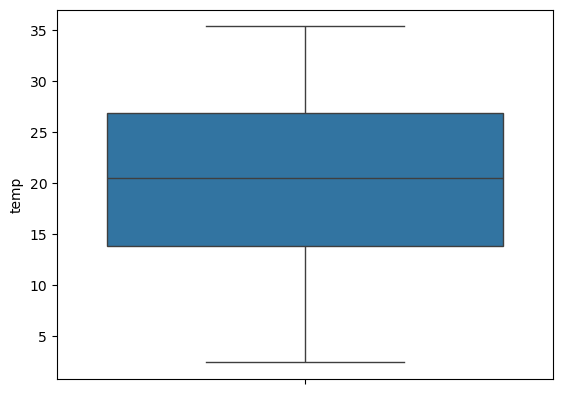

In [16]:
sns.boxplot(bike_sharing_df.temp)

In [17]:
#checking the quantile value for temp to see if any data needs to be removed

bike_sharing_df.temp.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    26.880615
0.80    28.125992
0.85    29.144153
0.90    29.998347
0.95    31.520460
0.97    32.052787
0.98    32.999536
0.99    33.868050
1.00    35.328347
Name: temp, dtype: float64

<b> There is no huge difference in temp data and distribution is almost consistent
No need to remove any outliers fromtempt colum</b>



#### Outlier Detection for atemp ####

<Axes: ylabel='atemp'>

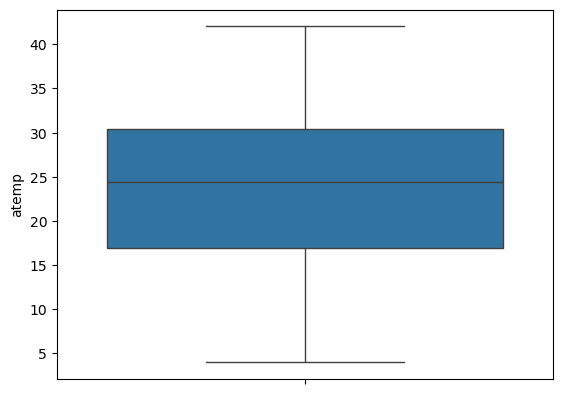

In [18]:
sns.boxplot(bike_sharing_df.atemp)

In [19]:
#checking the quantile value for atemp to see if any data needs to be removed

bike_sharing_df.atemp.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    30.445775
0.80    31.881620
0.85    32.734530
0.90    33.908210
0.95    35.749975
0.97    36.629070
0.98    37.440100
0.99    38.941650
1.00    42.044800
Name: atemp, dtype: float64

<b> There is no huge difference in atemp data and distribution is almost consistent
No need to remove any outliers from atemp column</b>

#### Outlier Detection for hum ####

<Axes: ylabel='hum'>

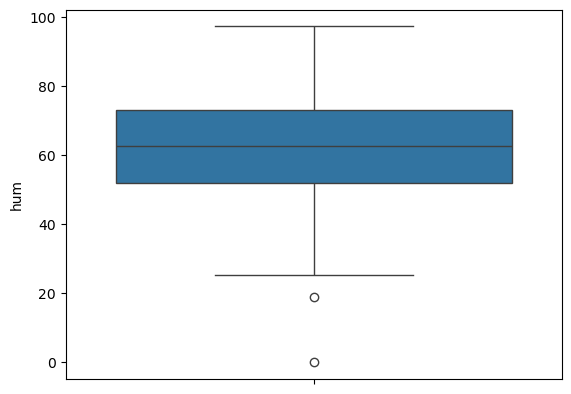

In [20]:
sns.boxplot(bike_sharing_df.hum)

In [21]:
#checking the quantile value for hum to see if any data needs to be removed

bike_sharing_df.hum.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    72.989575
0.80    75.291700
0.85    77.568740
0.90    81.762500
0.95    86.868735
0.97    89.540550
0.98    90.830814
0.99    92.795857
1.00    97.250000
Name: hum, dtype: float64

<b> There is no huge difference in hum data and distribution is almost consistent
No need to remove any outliers from hum column</b>

#### Outlier Detection for windspeed ####

<Axes: ylabel='windspeed'>

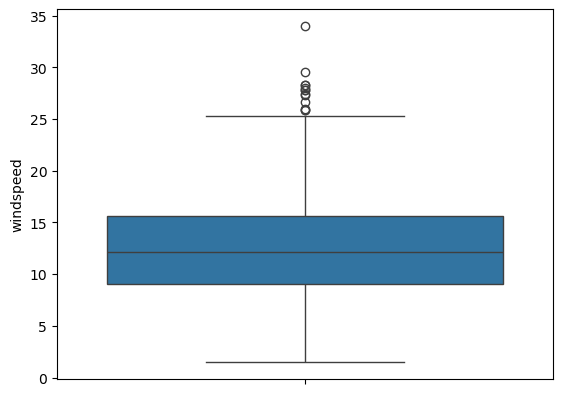

In [22]:
sns.boxplot(bike_sharing_df.windspeed)

In [23]:
#checking the quantile value for hum to see if any data needs to be removed

bike_sharing_df.windspeed.quantile([0.75,0.80 ,0.85,0.90,0.95,0.97,0.98,0.99,1])

0.75    15.625589
0.80    16.639785
0.85    18.128709
0.90    19.833997
0.95    22.999988
0.97    23.999167
0.98    25.201627
0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

<b> There is no huge difference in windspeed data and distribution is almost consistent
No need to remove any outliers from windspeed column</b>

#### Analysis of Month and Year ####

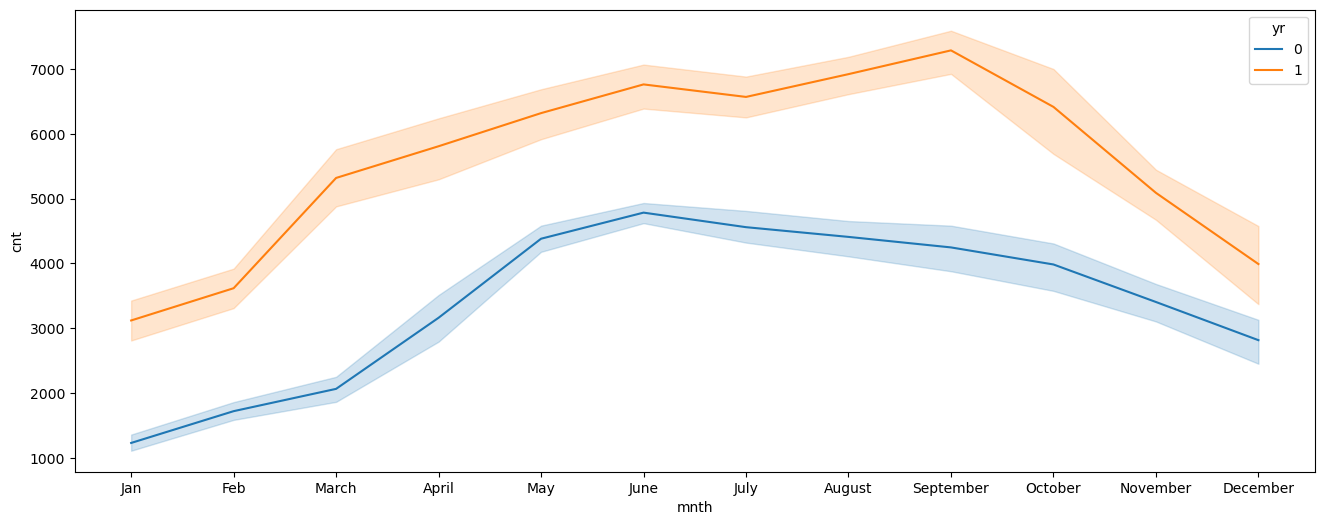

In [24]:
plt.figure(figsize=(16,6))
sns.lineplot(x = "mnth", y = "cnt", data=bike_sharing_df,hue = "yr")
plt.show()

<b> Count increased in 2019 as compared to 2018 </b>

<b>Observations</b>
- cnt has increased from 2018 to 2019
- cnt is higher from May to October
- No outliers present

#### Bivariate Analysis of Categorical Columns ####
- season
- weathersit
- holiday
- weekday

<b> Analysis of Season with respect to Count</b>

<Axes: xlabel='season', ylabel='cnt'>

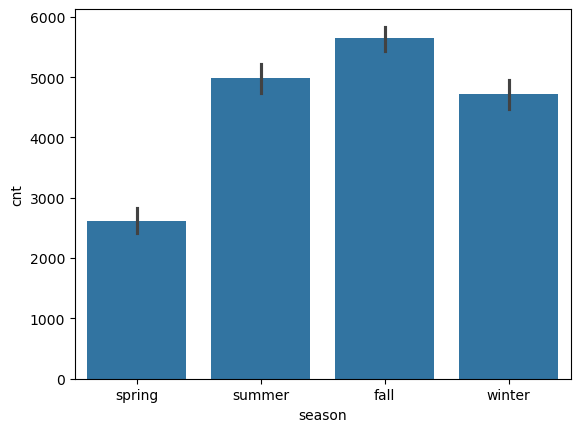

In [25]:
sns.barplot(x='season', y='cnt', data=bike_sharing_df)

<b> Fall season having high no of count</b>

<b> Analysis of Season with respect to Count and compare the count for both the years</b>

<Axes: xlabel='season', ylabel='cnt'>

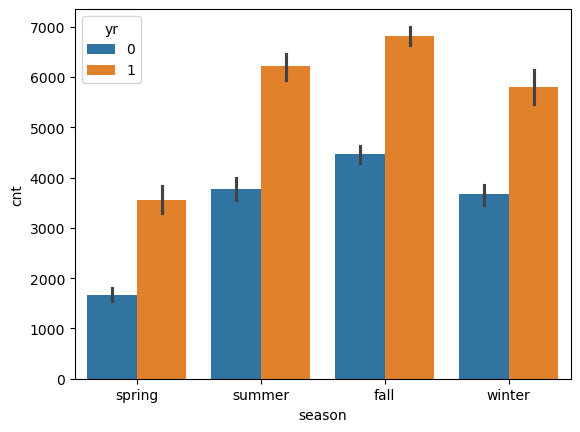

In [26]:
sns.barplot(x='season', y='cnt', data=bike_sharing_df, hue='yr')

<b> Count is higher in 2019 as compared to 2018 for all seasons</b>

<b>Observations</b>
- Fall season having high no of count
- Count is higher in 2019 as compared to 2018 for all seasons

<b> Analysis of weathersit with respect to Count</b>

<Axes: xlabel='weathersit', ylabel='cnt'>

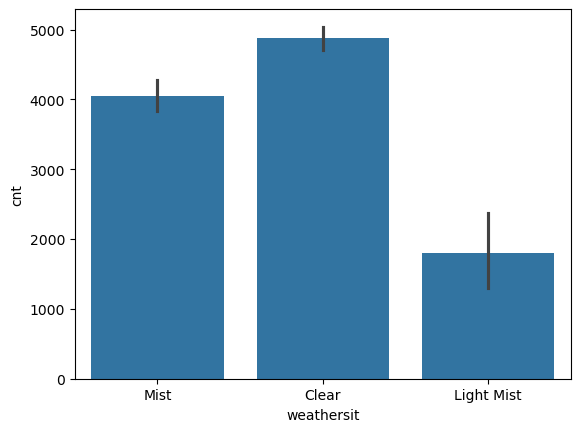

In [27]:
sns.barplot(x='weathersit', y='cnt', data=bike_sharing_df)

<b> Count is higher when it is clear weather</b>

<b> Analysis of Weathersit with respect to Count and compare the count for both the years</b>

<Axes: xlabel='weathersit', ylabel='cnt'>

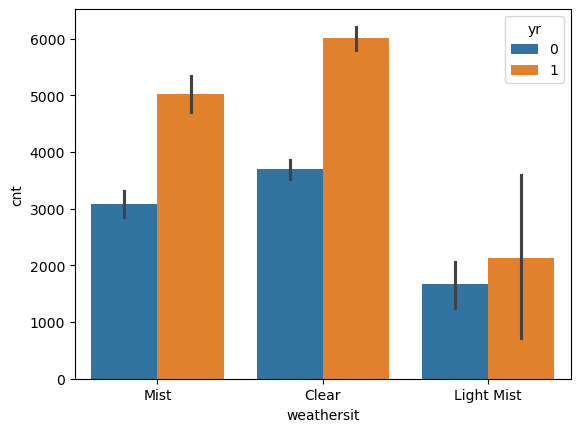

In [28]:
sns.barplot(x='weathersit', y='cnt', data=bike_sharing_df,hue='yr')

<b>Count is higher in 2019 as compared to 2018 for all weathersit</b>

<b>Observations</b>
- Count is higher when it is clear weather
- Count is higher in 2019 as compared to 2018 for all weathersit

<b> Analysis of holiday with respect to Count</b>

<Axes: xlabel='holiday', ylabel='cnt'>

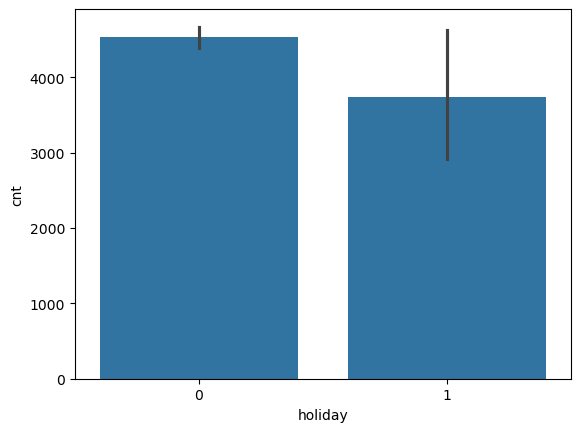

In [29]:
sns.barplot(x='holiday', y='cnt', data=bike_sharing_df)

<b>Count is higher on Non holidays</b>

 <b> Analysis of holiday with respect to Count and year</b>

<Axes: xlabel='holiday', ylabel='cnt'>

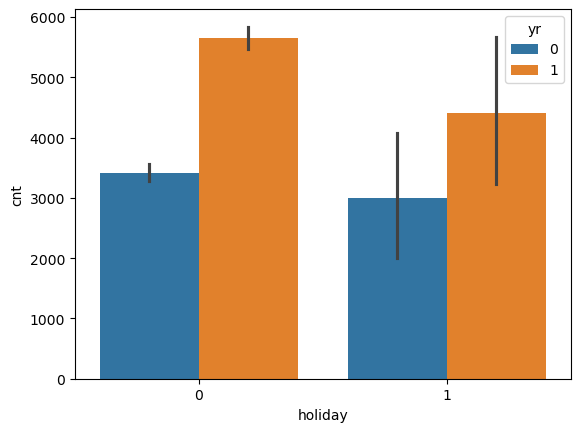

In [30]:
sns.barplot(x='holiday', y='cnt', data=bike_sharing_df, hue='yr')

<b>Count increased in 2019 as compared to 2018 for both holidays and non hoidays</b>

<b>Observations</b>
- Count is higher on Non holidays
- Count increased in 2019 as compared to 2018 for both holidays and non hoidays

<b> Analysis of weekday with respect to Count</b>

<Axes: xlabel='weekday', ylabel='cnt'>

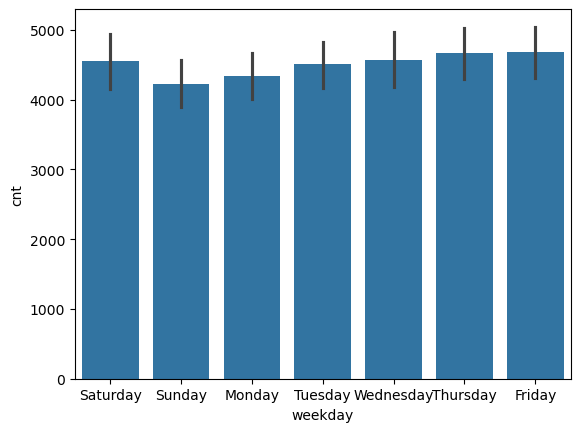

In [31]:
sns.barplot(x='weekday', y='cnt', data=bike_sharing_df)

<b>Less no of counts on Sunday</b>

<b> Analysis of weekday with respect to Count and year</b>

<Axes: xlabel='weekday', ylabel='cnt'>

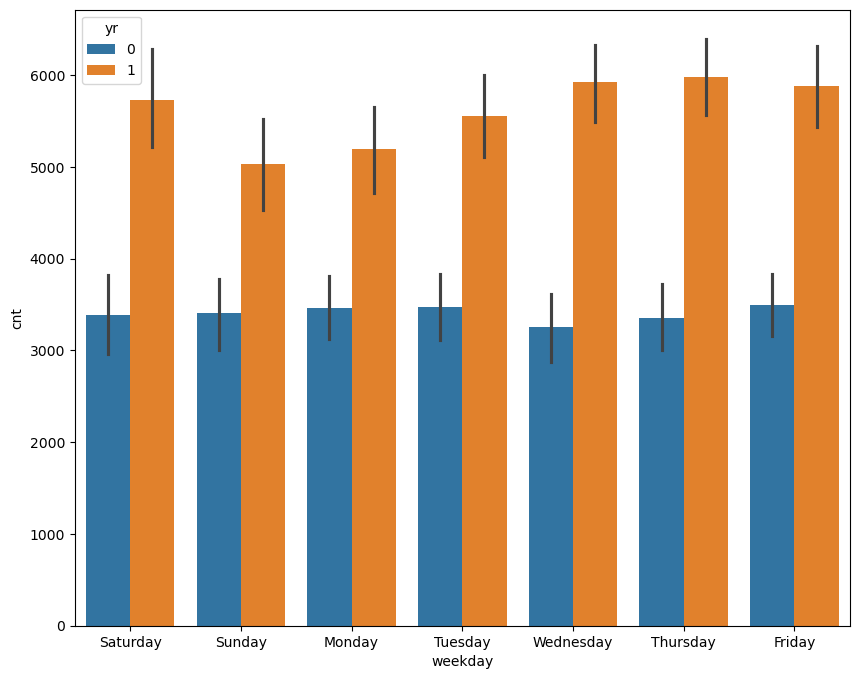

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x='weekday', y='cnt', data=bike_sharing_df,hue='yr')

<b>Count increased on 2019 as compared to 2018 for all weekdays</b>

<b>Observations</b>
- Less no of counts on Sunday
- Count increased on 2019 as compared to 2018 for all weekdays

#### Multivariate Analysis for Numeric columns ####

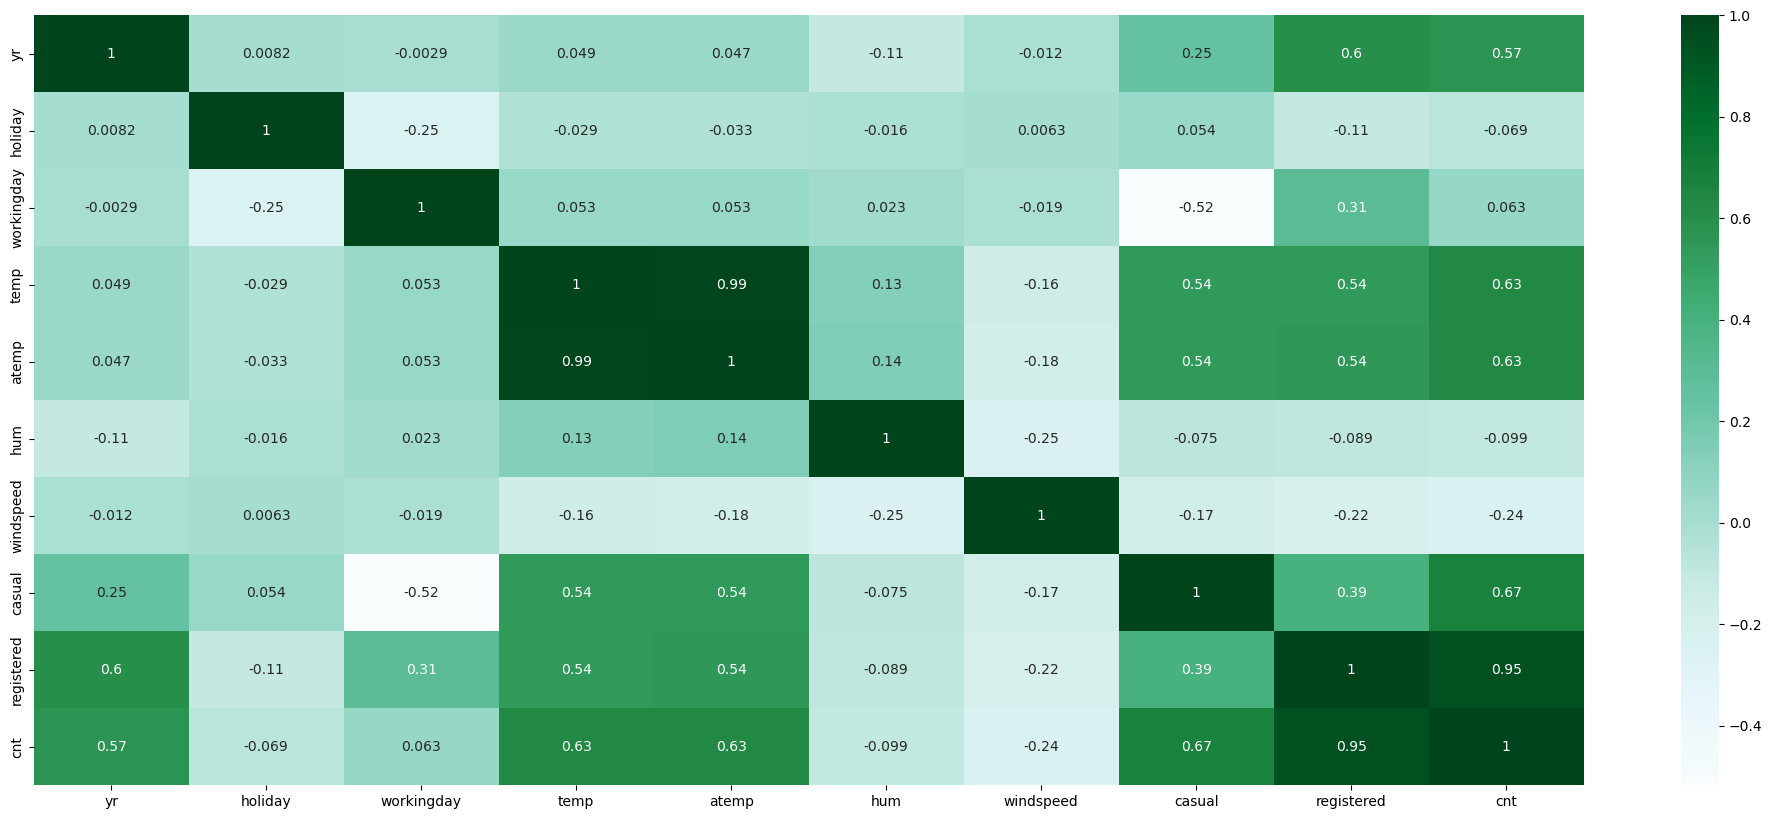

In [33]:
# Correlation matrix for finding correlation between variables
plt.figure(figsize=(25,10))
sns.heatmap(bike_sharing_df.select_dtypes(include=[np.number]).corr(), cmap='BuGn', annot = True)
plt.show()

<b>Observations</b>
- We can infer from heat map that casual and registered are highly correlated wth cnt. Count is sum of Registered and Casual
- Holiday, Hum, Windspeed are negatively correlated with cnt
- Independant variable temp and atemp are highly correlated. One of them can be removed

#### Dropping Casual and Registered columns #### 

In [34]:
bike_sharing_df.drop(['casual','registered'], axis=1, inplace=True)

#### Shape of dataframe after dropping casual and registered columns ####

In [35]:
bike_sharing_df.shape

(730, 12)

#### Need to create dummy variable for categorical columns ####

In [36]:
bike_sharing_df = pd.get_dummies(bike_sharing_df, drop_first= True)

In [37]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Mist,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


#### Shape of Dataset after adding dummy variables ####

In [38]:
bike_sharing_df.shape

(730, 30)

In [39]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    bool   
 9   season_summer          730 non-null    bool   
 10  season_winter          730 non-null    bool   
 11  mnth_August            730 non-null    bool   
 12  mnth_December          730 non-null    bool   
 13  mnth_Feb               730 non-null    bool   
 14  mnth_Jan               730 non-null    bool   
 15  mnth_J

bike_sharing_df.describe()

#### Prepare Train and Test Data ####

In [40]:
np.random.seed(0)
bike_sharing_df_train, bike_sharing_df_test  = train_test_split(bike_sharing_df, train_size=0.75, test_size=0.25, random_state=100)

#### Scaling of Numerical Variables ####

In [41]:
## Numerical variables in dataset
numerical_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
## Initializing MinMaxScaler for scaling numerical variables from 0-1 
scaler=MinMaxScaler()

bike_sharing_df_train[numerical_vars] = scaler.fit_transform(bike_sharing_df_train[numerical_vars])

#### Shape of Train Dataset after Scaling ####

In [42]:
bike_sharing_df_train.shape

(547, 30)

#### Shape of Train Dataset after Scaling ####

In [43]:
bike_sharing_df_test.shape

(183, 30)

#### Train Dataset ####

In [44]:
bike_sharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Mist,weathersit_Mist
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,False,False,...,False,False,False,False,False,False,True,False,False,False
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,False,True,...,False,False,False,False,False,False,False,False,False,False
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,True,False,...,False,False,False,False,False,False,True,False,False,True
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,True,False,...,False,False,False,True,False,False,False,False,False,False
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,False,False,...,False,True,False,False,True,False,False,False,False,False


#### Pop cnt variable from Train dataset as it is target variable ####

In [45]:
y_bike_sharing_df_train = bike_sharing_df_train.pop('cnt')
x_bike_sharing_df_train = bike_sharing_df_train

-----  <b>Data Preparation and Analysis is completed</b> -----

### Building/Training a Model ###

#### Use StatsModel to build a model ####

In [46]:
## Build a model with all features using statsmodel
import statsmodels.api as sm
x_bike_sharing_df_train_lm = sm.add_constant(x_bike_sharing_df_train)

lr = sm.OLS(y_bike_sharing_df_train, x_bike_sharing_df_train_lm.astype(float)).fit()
lr.params

const                    0.236250
yr                       0.230799
holiday                 -0.001091
workingday               0.100289
temp                     0.391615
atemp                    0.054732
hum                     -0.146786
windspeed               -0.177329
season_spring           -0.051909
season_summer            0.044084
season_winter            0.114196
mnth_August              0.023972
mnth_December           -0.050054
mnth_Feb                -0.027709
mnth_Jan                -0.055422
mnth_July               -0.030713
mnth_June                0.013485
mnth_March               0.005259
mnth_May                 0.021377
mnth_November           -0.043688
mnth_October             0.009619
mnth_September           0.086487
weekday_Monday          -0.023312
weekday_Saturday         0.095602
weekday_Sunday           0.041450
weekday_Thursday        -0.010611
weekday_Tuesday         -0.021888
weekday_Wednesday       -0.008645
weathersit_Light Mist   -0.259461
weathersit_Mis

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          4.86e-198
Time:                        16:11:27   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2363      0.034      6.936      0.000       0.169       0.303
yr                        0.2308      0.008     30.023      0.000       0.216       0.246
holiday                  -0.0011      0.022     -0.049      0.961      -0.045       0.043
workingday                0.1003      0.012      8.552      0.000       0.077       0.123
temp                      0.3916      0.138      2.838      0.005       0.121       0.663
atemp                     0.0547      0.136      0.404      0.686      -0.211       0.321
hum                      -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed                -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_spring            -0.0519      0.028     -1.828      0.068      -0.108       0.004
season_summer             0.0441      0.025      1.761      0.079      -0.005       0.093
season_winter             0.1142      0.026      4.341      0.000       0.063       0.166
mnth_August               0.0240      0.032      0.739      0.461      -0.040       0.088
mnth_December            -0.0501      0.032     -1.570      0.117      -0.113       0.013
mnth_Feb                 -0.0277      0.031     -0.884      0.377      -0.089       0.034
mnth_Jan                 -0.0554      0.032     -1.720      0.086      -0.119       0.008
mnth_July                -0.0307      0.034     -0.911      0.363      -0.097       0.036
mnth_June                 0.0135      0.024      0.573      0.567      -0.033       0.060
mnth_March                0.0053      0.024      0.218      0.827      -0.042       0.053
mnth_May                  0.0214      0.020      1.048      0.295      -0.019       0.061
mnth_November            -0.0437      0.035     -1.256      0.210      -0.112       0.025
mnth_October              0.0096      0.034      0.283      0.777      -0.057       0.076
mnth_September            0.0865      0.031      2.821      0.005       0.026       0.147
weekday_Monday           -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_Saturday          0.0956      0.013      7.272      0.000       0.070       0.121
weekday_Sunday            0.0415      0.013      3.147      0.002       0.016       0.067
weekday_Thursday         -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_Tuesday          -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_Wednesday        -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_Light Mist    -0.2595      0.026     -9.971      0.000      -0.311      -0.208
weathersit_Mist          -0.0598      0.010     -6.002      0.000      -0.079      -0.040
==============================================================================
Omnibus:                       92.

<b> Adjusted R2 is 0.848 which is pretty good. Now see what are the important independant variables </b>

#### Eliminating insignificant variable ####

In [48]:
## Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
